Name: Bessa Tamarra
<br>Chosen Dataset: Breast Cancer Wisconson (Original) https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

<h4>Assignment 8 </h4>

<h5>Imports & Dataset Retrieval</h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", 
                "Normal Nucleoli", "Mitoses", "Class"]
df = pd.read_csv(url, names=column_names)


<h5>EDA & Data Preprocessing</h5>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        

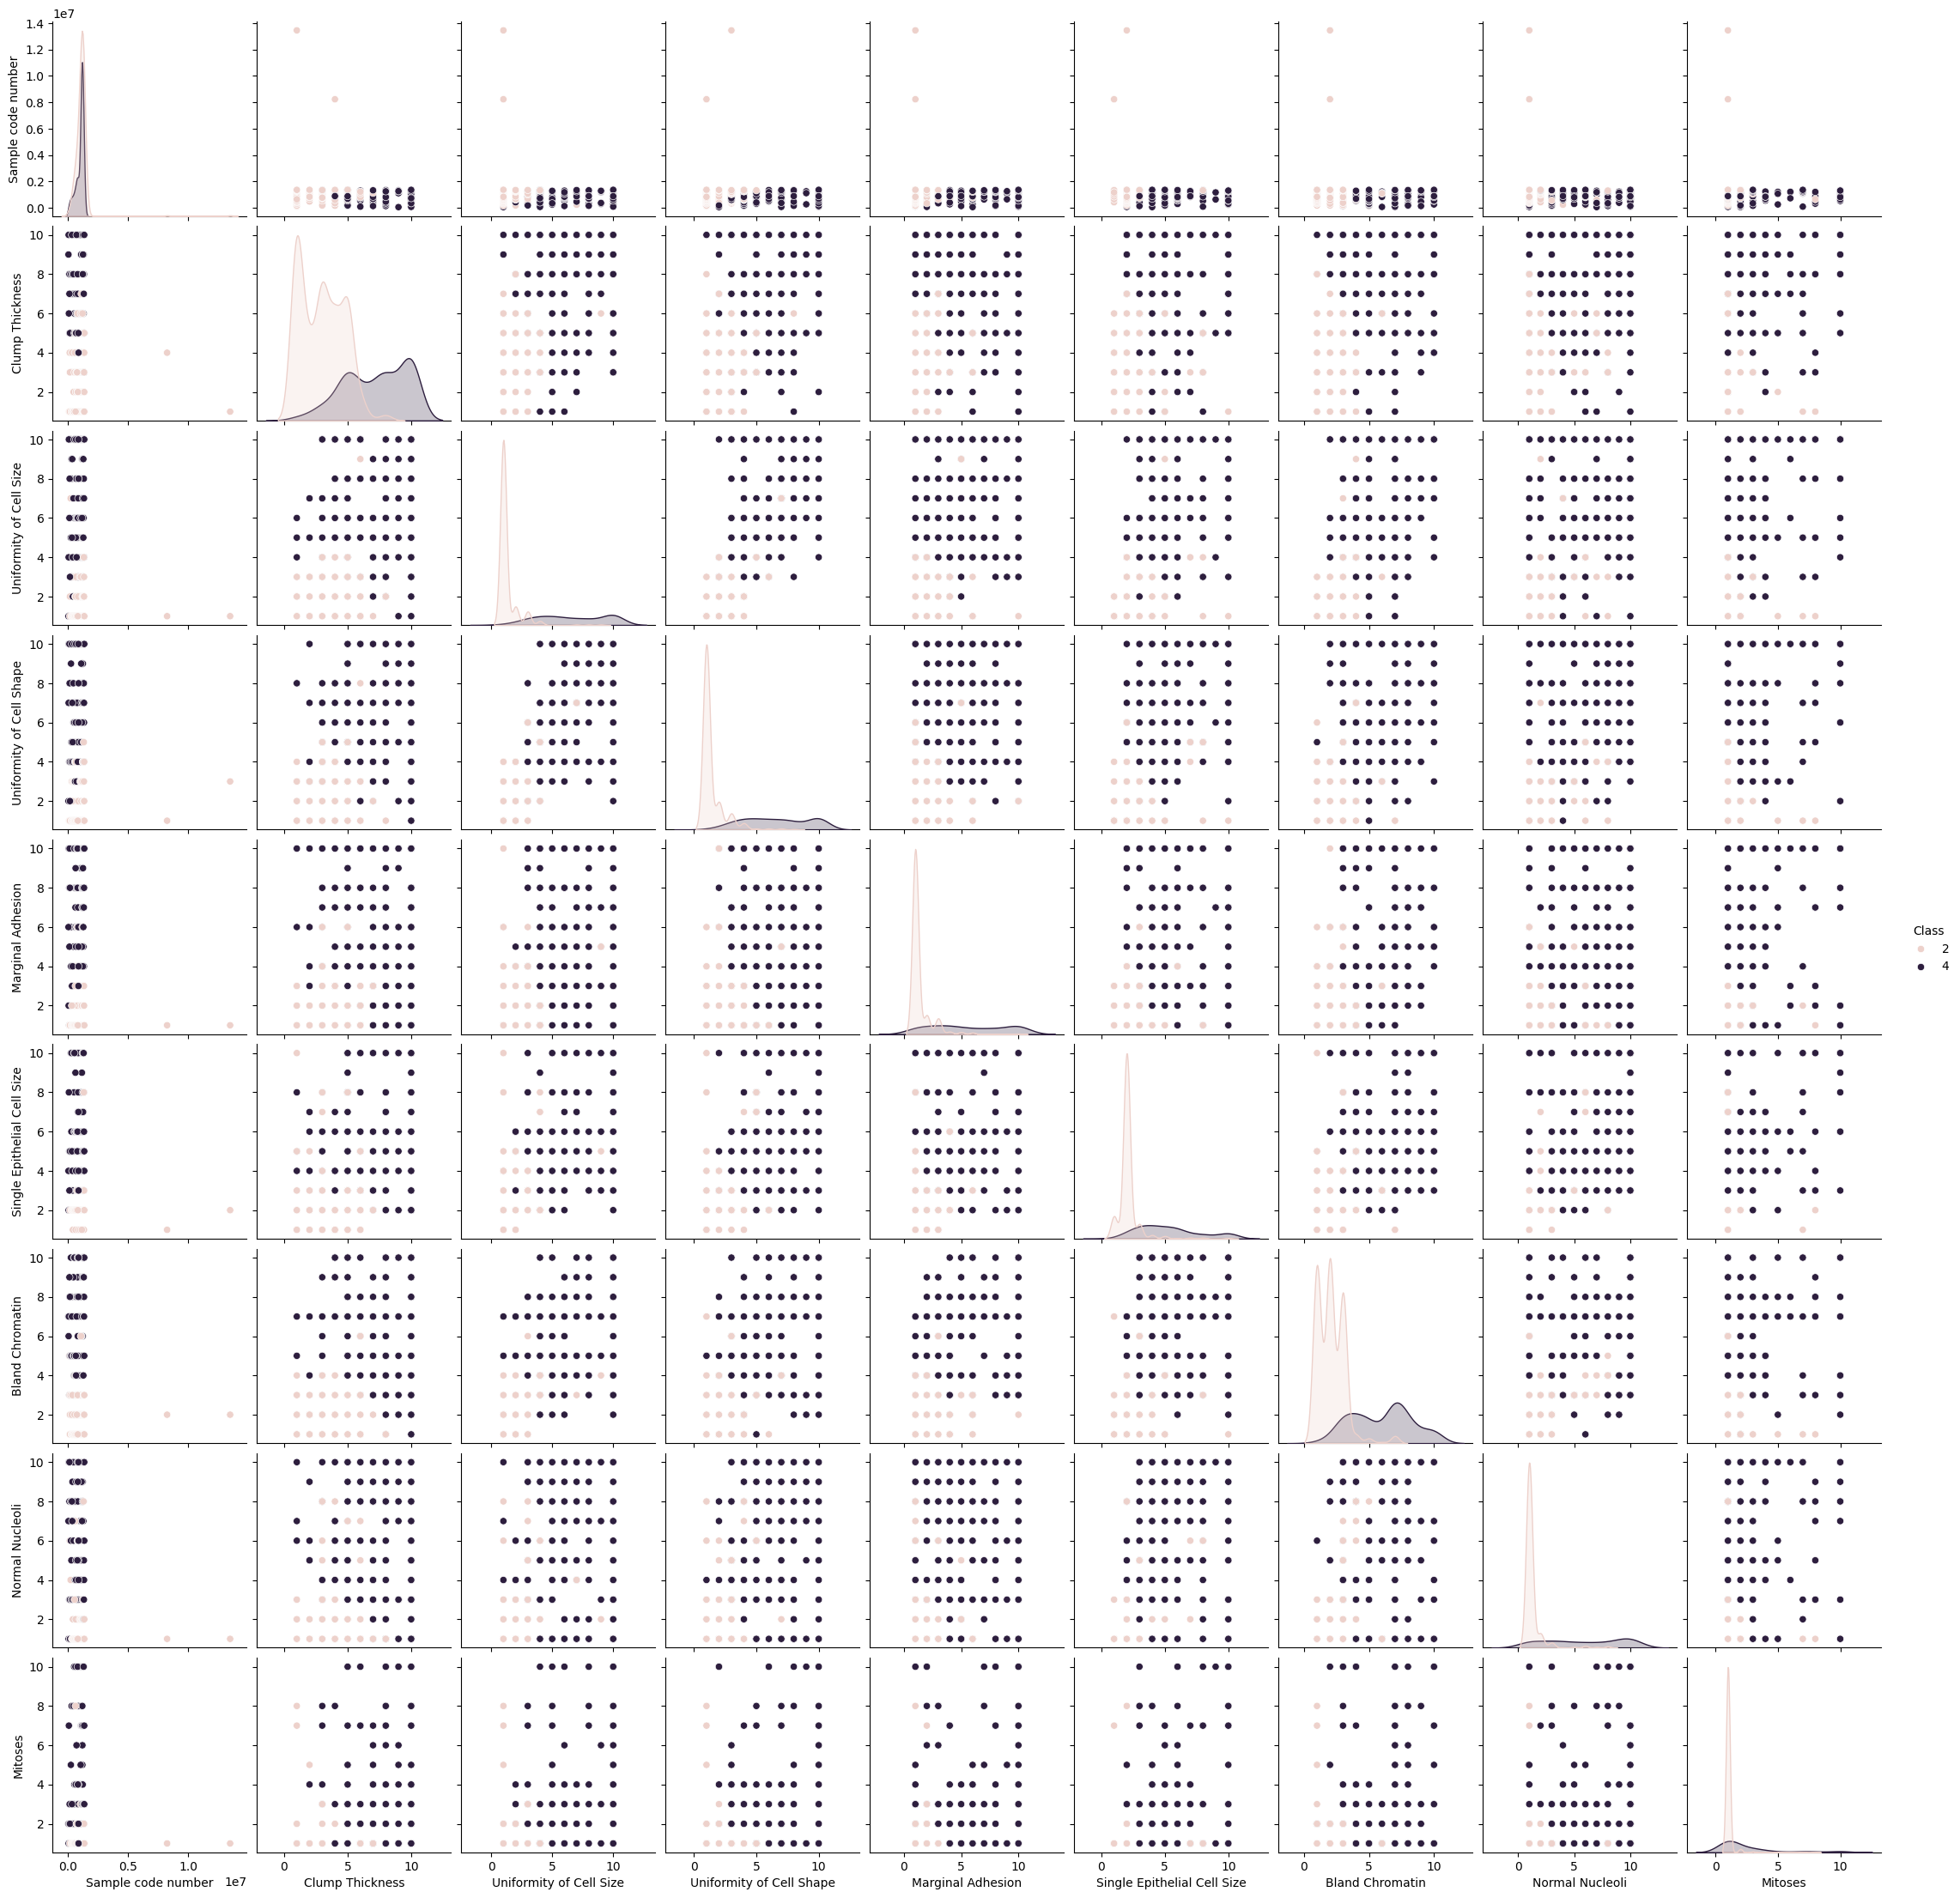

In [2]:
print(df.info())
print(df.isna().sum())
df = df.replace('?', np.nan).dropna()
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.show()


<h5>Train Test split & model fitting</h5>

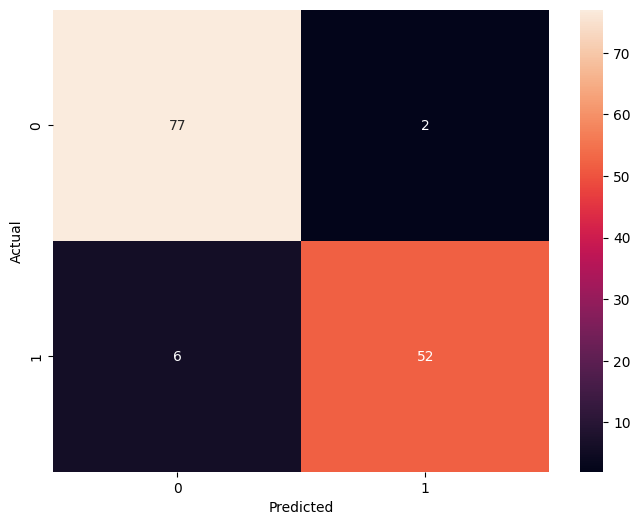

              precision    recall  f1-score   support

           2       0.93      0.97      0.95        79
           4       0.96      0.90      0.93        58

    accuracy                           0.94       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137

Feature Importance:
                             Feature Importance
Sample code number                     0.013965
Clump Thickness                        0.019974
Uniformity of Cell Size                0.758844
Uniformity of Cell Shape               0.007447
Marginal Adhesion                      0.025113
Single Epithelial Cell Size            0.024125
Bare Nuclei                            0.091709
Bland Chromatin                        0.013508
Normal Nucleoli                        0.045315
Mitoses                                0.000000


In [4]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
base_pred = model.predict(X_test)

cm = confusion_matrix(y_test, base_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, base_pred))
print("Feature Importance:")
print(pd.DataFrame(index=df.drop('Class', axis=1).columns, data=model.feature_importances_, columns=['Feature Importance']))


<h5>Visualizing Decision Tree</h5>

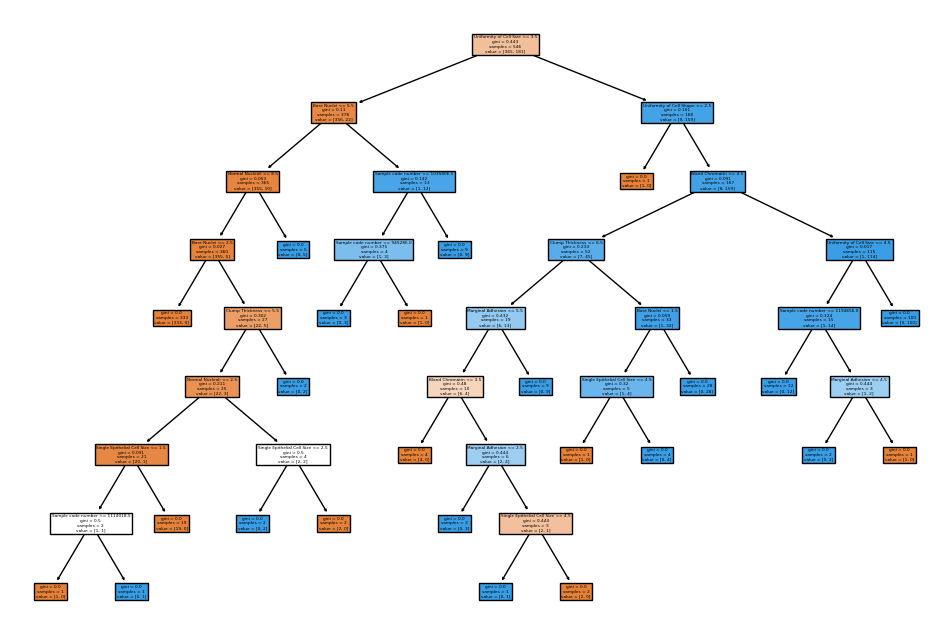

In [5]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=df.drop('Class', axis=1).columns)
plt.show()

<h5>Model Results</h5>

              precision    recall  f1-score   support

           2       0.93      0.97      0.95        79
           4       0.96      0.90      0.93        58

    accuracy                           0.94       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137



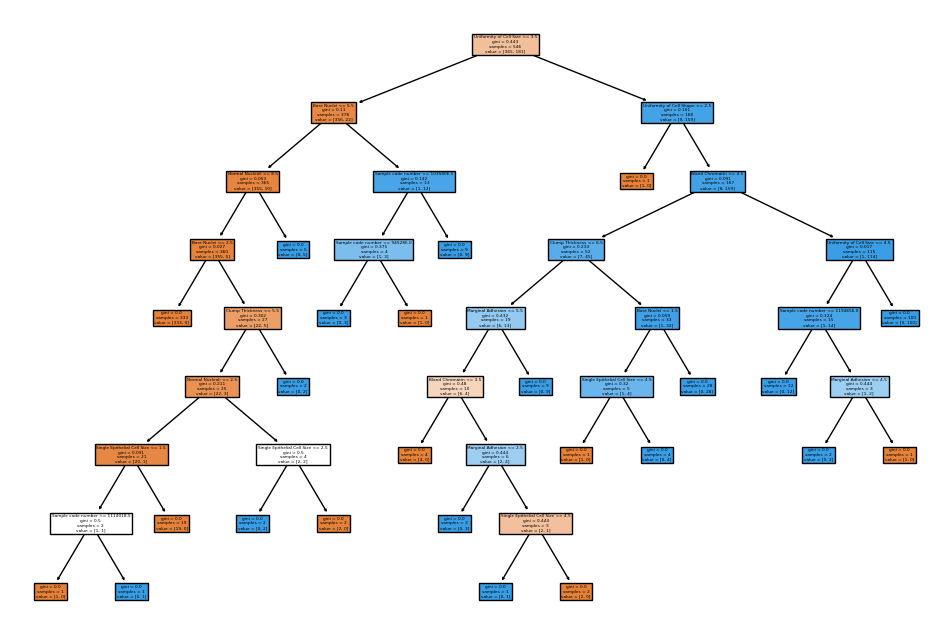

In [6]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=df.drop('Class', axis=1).columns)
report_model(model)


<h5>Pruning</h5>

              precision    recall  f1-score   support

           2       0.92      0.96      0.94        79
           4       0.94      0.88      0.91        58

    accuracy                           0.93       137
   macro avg       0.93      0.92      0.92       137
weighted avg       0.93      0.93      0.93       137

              precision    recall  f1-score   support

           2       0.94      0.96      0.95        79
           4       0.95      0.91      0.93        58

    accuracy                           0.94       137
   macro avg       0.94      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137

              precision    recall  f1-score   support

           2       0.92      0.99      0.95        79
           4       0.98      0.88      0.93        58

    accuracy                           0.94       137
   macro avg       0.95      0.93      0.94       137
weighted avg       0.94      0.94      0.94       137



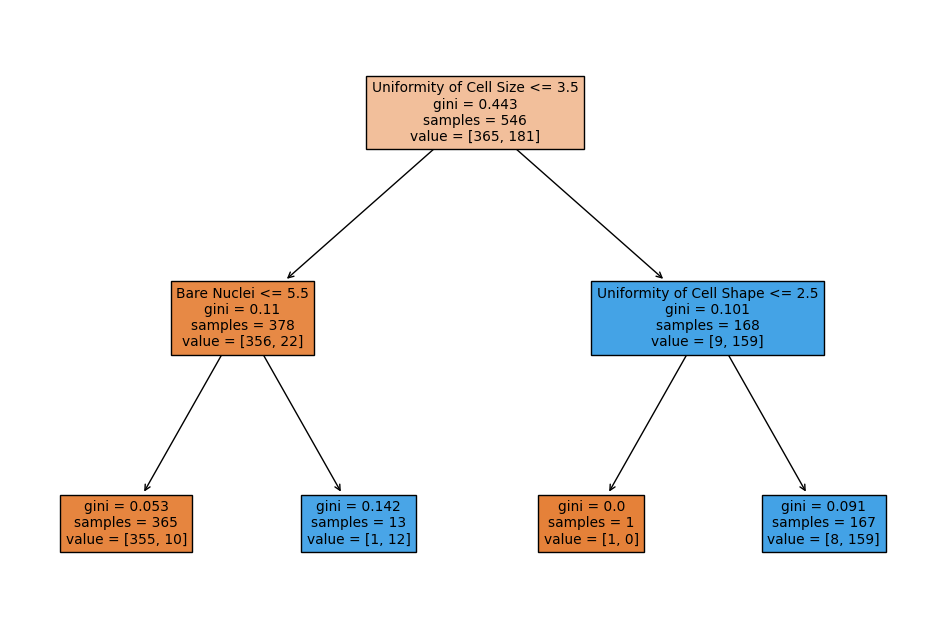

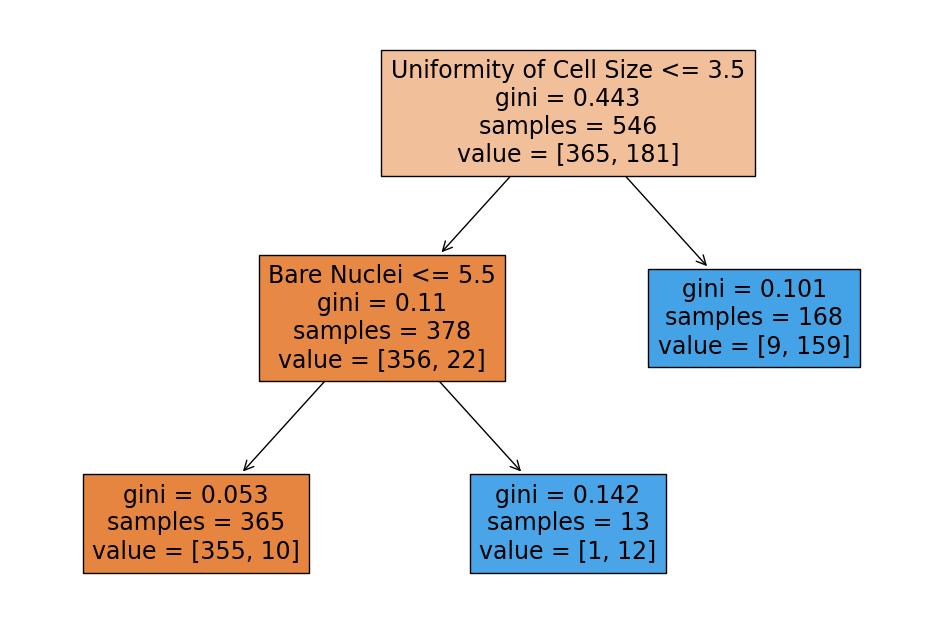

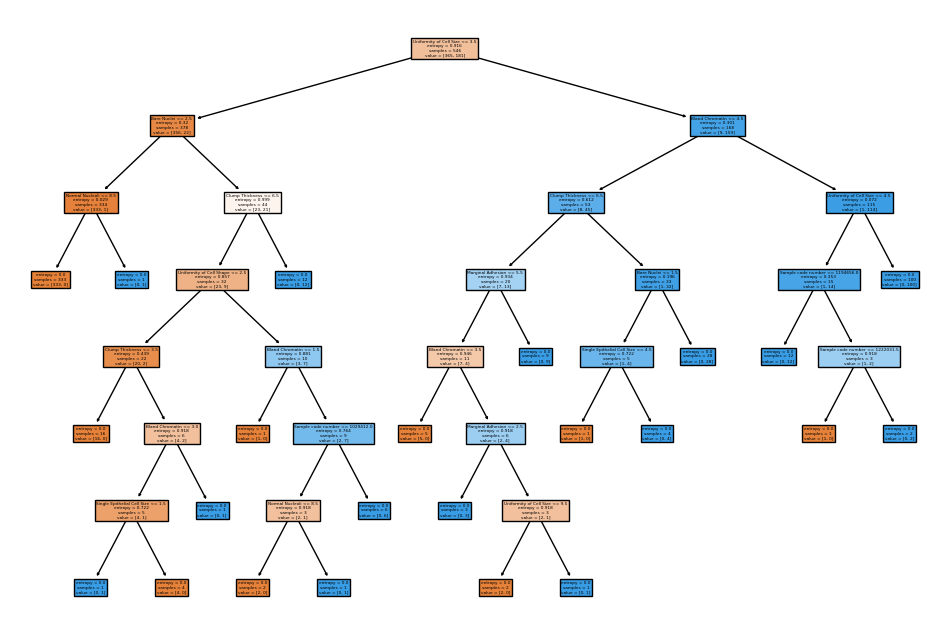

In [7]:
# max_depth=2
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train, y_train)
report_model(pruned_tree)

# max_leaf_nodes=3
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train, y_train)
report_model(pruned_tree)

# entropy splitting criterion
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train, y_train)
report_model(entropy_tree)
